About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

**Reminder:** Plagiarism is prohibited. Use of AI without mentioning how and in which parts it was used is also prohibited. If plagiarism or dishonest use of AI is revealed, the assignment is graded with 0.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Let's work with data about students.

In [ ]:
!wget https://raw.githubusercontent.com/Majid-Sohrabi/DAM-2024/refs/heads/main/07-trees/students.csv

In [2]:
df = pd.read_csv('data/students.csv')

df

,ID,Performance Index,Previous Scores (out of 10),Sample Question Papers Practiced,Hours Studied,Hours Prepared for Exams,Hours Free time,Sleep Hours,Hours Not Sleep,Extracurricular Activities,Has a car,Sex,Height,Weight,BMI,Eye color,Nails length,Favorite Subject,Least Favorite Subject
0,1,32.0,6,0,1,1,15,4,20,No,No,f,1.723207,72.304822,24.349622,brown,0.001867,Art,Machine Learning
1,2,95.0,9,3,9,4,5,8,16,No,No,m,1.673278,73.321177,26.187449,blue,0.001711,History,Machine Learning
2,3,58.0,6,3,8,3,9,5,19,No,Yes,f,1.592017,57.102095,22.529751,gray,0.007593,NaN,History
3,4,44.0,5,3,7,3,8,4,20,No,No,f,1.643083,77.074855,28.549173,brown,0.009790,Algebra,Biology
4,5,61.0,5,3,8,3,6,8,16,No,No,f,1.717139,52.908173,17.943690,green,0.009326,Biology,Art
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,83.0,10,7,5,2,10,4,20,Yes,Yes,f,1.645952,59.918738,22.117097,brown,0.002543,Music,Machine Learning
996,997,75.0,8,8,8,3,7,6,18,No,Yes,m,1.661157,67.080495,24.309451,hazel,0.009716,History,PE
997,998,48.0,7,2,3,2,12,6,18,Yes,No,m,1.764359,65.525177,21.049138,brown,0.005671,PE,NaN
998,999,38.0,5,9,4,2,12,4,20,No,No,m,1.664407,69.922753,25.240577,gray,0.000137,Drama,NaN


We will predict their performance index.

In [3]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

# Task 1 (2 points)

Let's try to propose hypothesis, which features will be the most useful.

For every feature $x^j$:

*   Draw a plot of $x^j$ and target (scatter plot, if feature is numerical and boxplot if the feature is categorical)
*   Compute correlation of  $x^j$ and target if the feature is numerical.



Draw conclusions: which features seems to be the most important? Which do not seem useful? Is it logical?

# let's get all numerics first 

In [103]:
categorical_columns = []
numeric_columns = []
hirarchial_columns = []

for col, type_ in zip(df.columns, df.dtypes):
    if type_ == 'object':
        categorical_columns.append(col)
    elif col == 'ID': # sertainly no need for taht
        pass
    else:
        if len(df[col].unique()) < 18: # to separate descrete columns from numeric 
            hirarchial_columns.append(col)
        else: 
            numeric_columns.append(col) # we can officially call this list 18+

df_numeric = df[numeric_columns + ['Eye color']]  # for hue for aestetics
df_numeric

,Performance Index,Height,Weight,BMI,Nails length,Eye color
0,32.0,1.723207,72.304822,24.349622,0.001867,brown
1,95.0,1.673278,73.321177,26.187449,0.001711,blue
2,58.0,1.592017,57.102095,22.529751,0.007593,gray
3,44.0,1.643083,77.074855,28.549173,0.009790,brown
4,61.0,1.717139,52.908173,17.943690,0.009326,green
...,...,...,...,...,...,...
995,83.0,1.645952,59.918738,22.117097,0.002543,brown
996,75.0,1.661157,67.080495,24.309451,0.009716,hazel
997,48.0,1.764359,65.525177,21.049138,0.005671,brown
998,38.0,1.664407,69.922753,25.240577,0.000137,gray


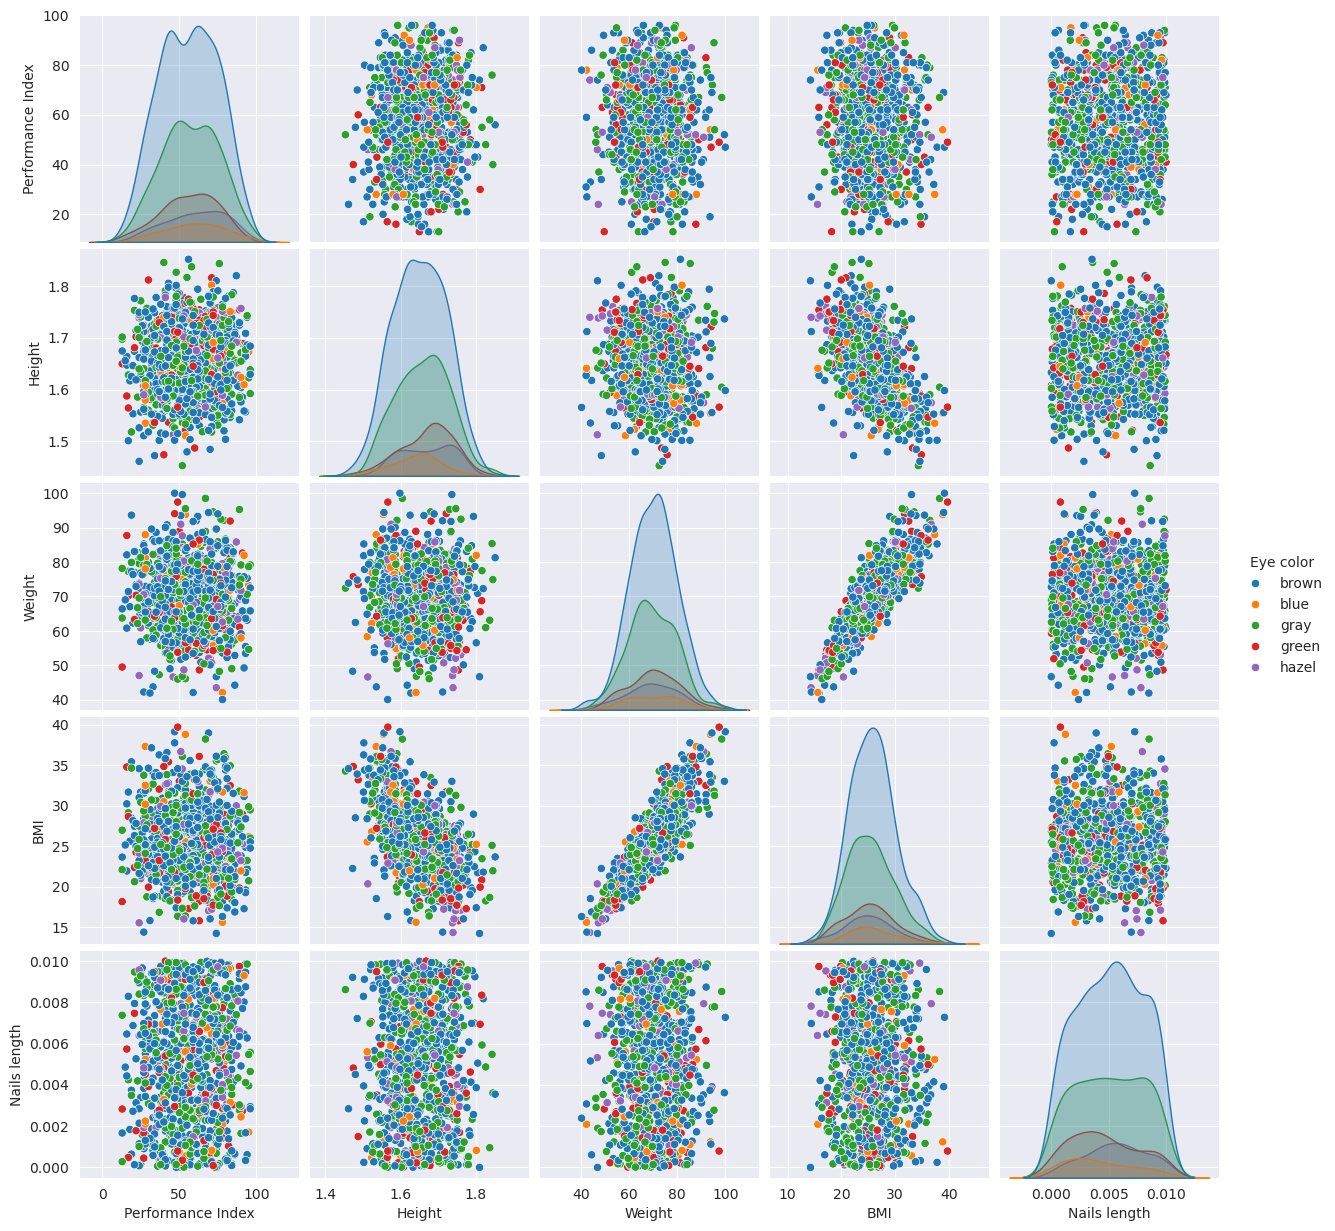

In [104]:
sns.pairplot(df_numeric, hue='Eye color')

Not much to say about this. There's a nice linear relationship between BMI and Weight but everything else basically morphes into a blob. Maybe correlation heatmap would help.

<Axes: title={'center': 'correlation matrix of continuous variables'}>

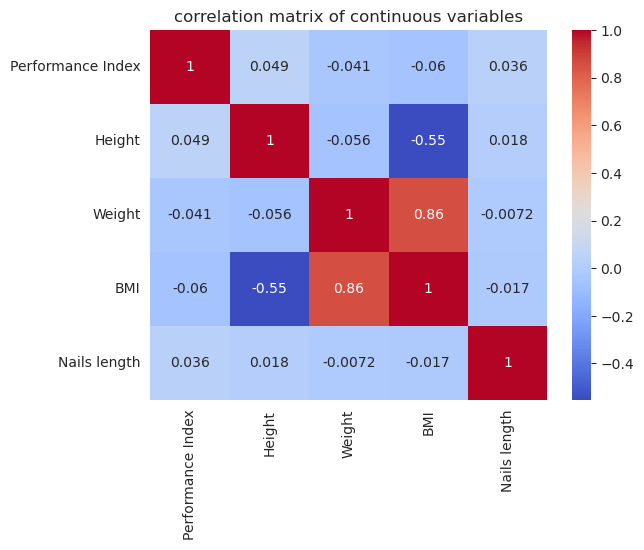

In [105]:
plt.title('correlation matrix of continuous variables')
sns.heatmap(df_numeric[numeric_columns].corr(method='pearson'), annot=True,  cmap='coolwarm')

so as i was saying there's only one strong positive correlation between `Weight` and `BMI`. Everything else does not have any remarkable relationship 

Let's also check for association between discrete hirarchial variables

In [106]:
df_discrete_hirarchial = df[hirarchial_columns].melt(var_name='Variable', value_name='Value')
df_discrete_hirarchial

,Variable,Value
0,Previous Scores (out of 10),6
1,Previous Scores (out of 10),9
2,Previous Scores (out of 10),6
3,Previous Scores (out of 10),5
4,Previous Scores (out of 10),5
...,...,...
6995,Hours Not Sleep,20
6996,Hours Not Sleep,18
6997,Hours Not Sleep,18
6998,Hours Not Sleep,20


Вecause usual methods of testing the relationships between the variables like correlations are unfit for discrete variables, we better use something like Cramer's V to measure the strength of association between two categorical variables.

So i propose construction of heatmap for tests of independence e for each variable. Heatmap will be showing p values

there's a significant association between `Previous Scores (out of 10)` and `Hours Prepared for Exams` with p = 0.015480632266964826
there's a significant association between `Hours Studied` and `Hours Prepared for Exams` with p = 0.0
there's a significant association between `Hours Studied` and `Hours Free time` with p = 1.0567921231116345e-73
there's a significant association between `Hours Prepared for Exams` and `Previous Scores (out of 10)` with p = 0.015480632266964826
there's a significant association between `Hours Prepared for Exams` and `Hours Studied` with p = 0.0
there's a significant association between `Hours Prepared for Exams` and `Hours Free time` with p = 1.1118248608426517e-81
there's a significant association between `Hours Free time` and `Hours Studied` with p = 1.0567921231115743e-73
there's a significant association between `Hours Free time` and `Hours Prepared for Exams` with p = 1.111824860842588e-81
there's a significant association between `Hours Free time` a

<Axes: title={'center': 'chi square heatmap of p values'}>

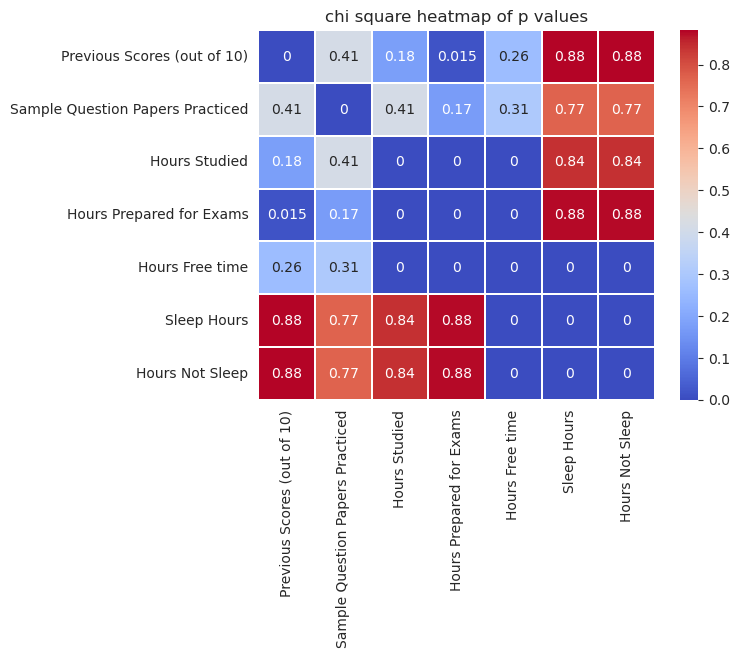

In [107]:
from scipy.stats import chi2_contingency

outercnt=0
innercnt=0

chisqmatrix=pd.DataFrame(df,columns=hirarchial_columns,index=hirarchial_columns)

for icol in hirarchial_columns:

    for jcol in hirarchial_columns:

        mycrosstab = pd.crosstab(df[icol], df[jcol])

        _, p, _, expected = chi2_contingency(mycrosstab)
        chisqmatrix.iloc[outercnt,innercnt] = round(p, 3)
        cntexpected = expected[expected<5].size
        perexpected = ((expected.size - cntexpected) / expected.size) * 100

        if perexpected < 20:
            chisqmatrix.iloc[outercnt,innercnt] = 2

        if icol == jcol:
            chisqmatrix.iloc[outercnt,innercnt] = 0.00
            
        if p <= 0.05 and icol != jcol:
            print(f"there's a significant association between `{icol}` and `{jcol}` with p = {p}")

        innercnt = innercnt + 1

    outercnt = outercnt + 1
    innercnt = 0

plt.title('chi square heatmap of p values')
sns.heatmap(chisqmatrix.astype(np.float64), annot=True, linewidths=0.1,
            cmap='coolwarm')

As we fount out that there's no obvious associations between continuous and target variables, we can test possible relationships with ANOVA tests

I'll use just one way ANOVA because we're interested in relationships between target and categorical variables.

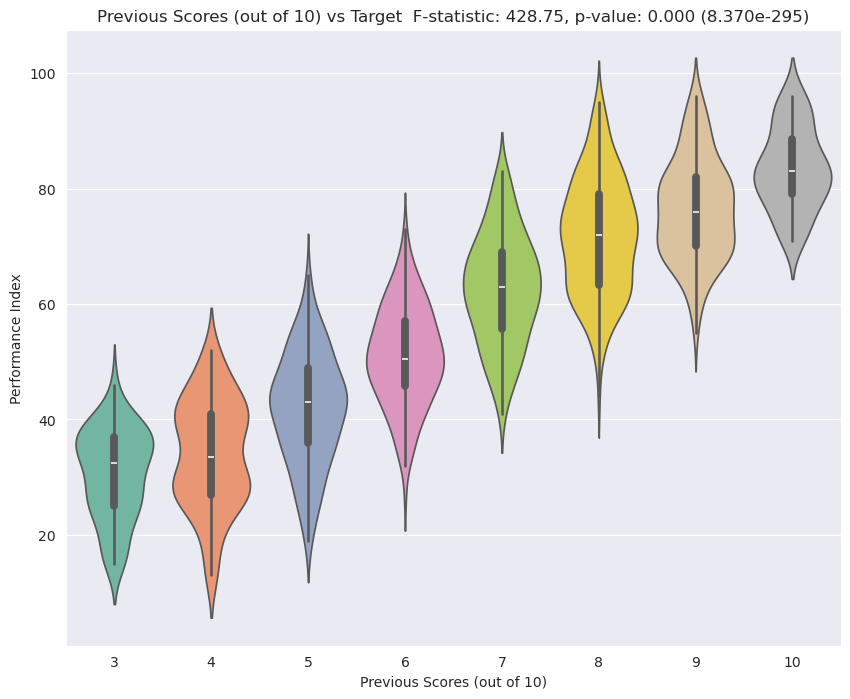

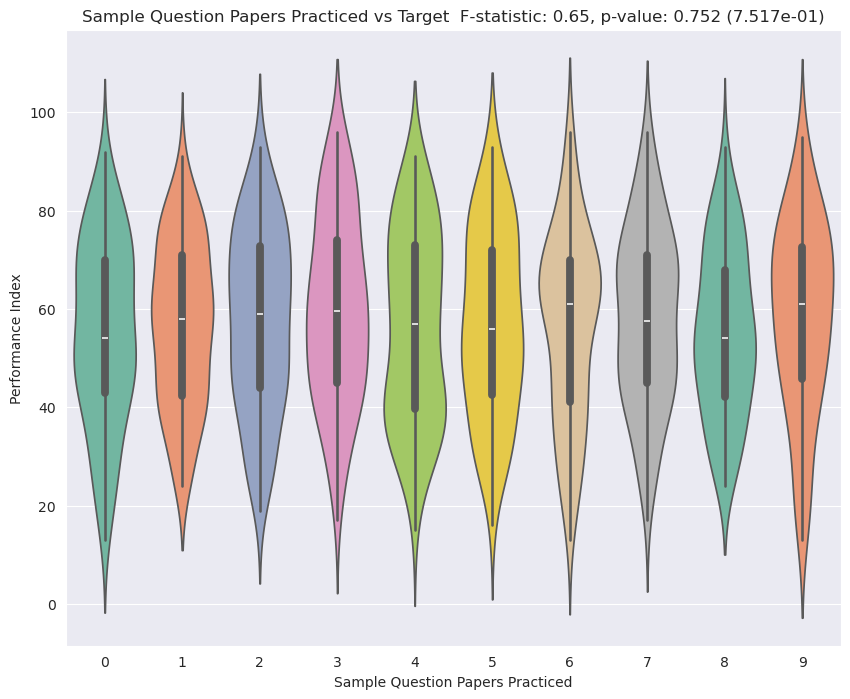

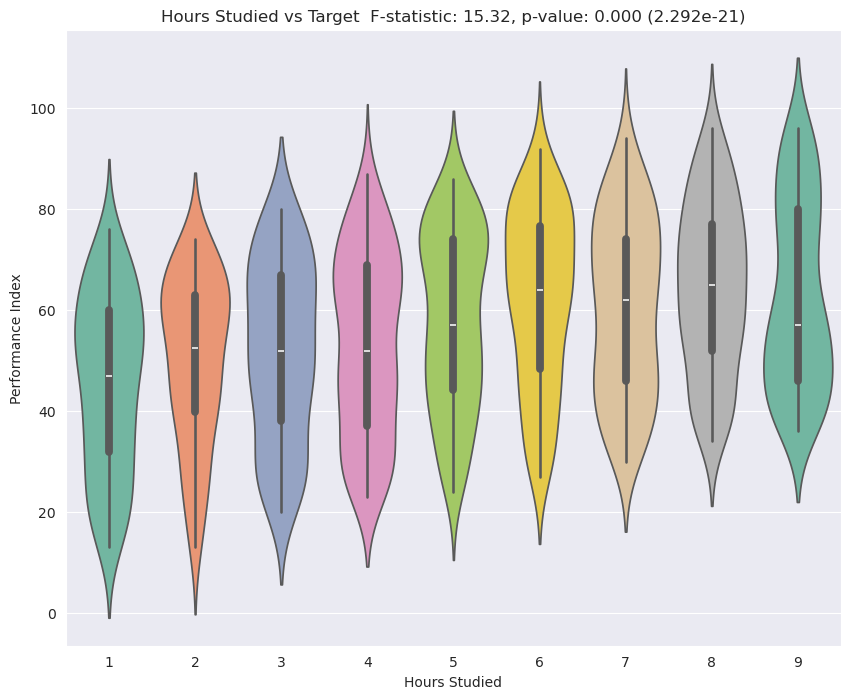

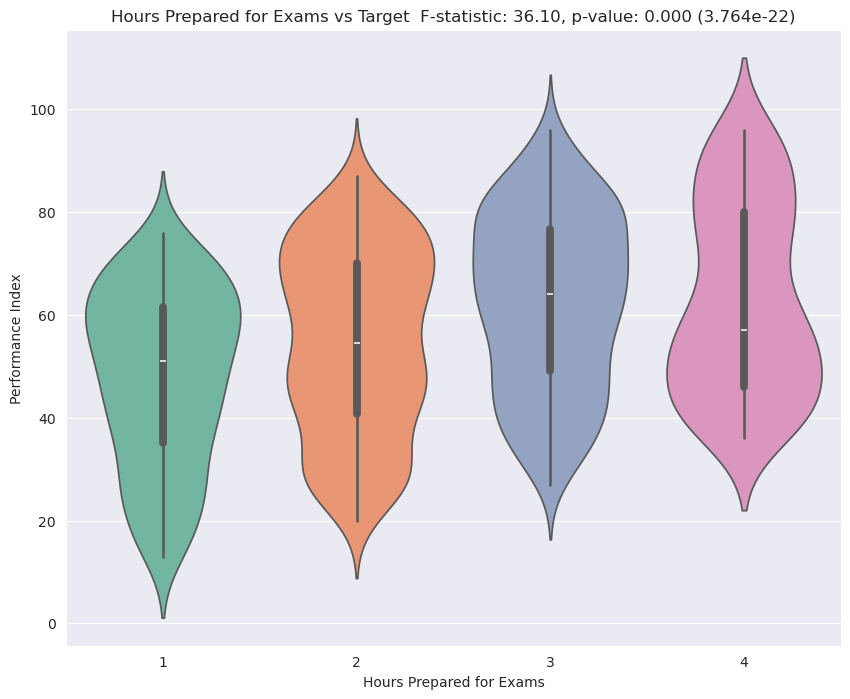

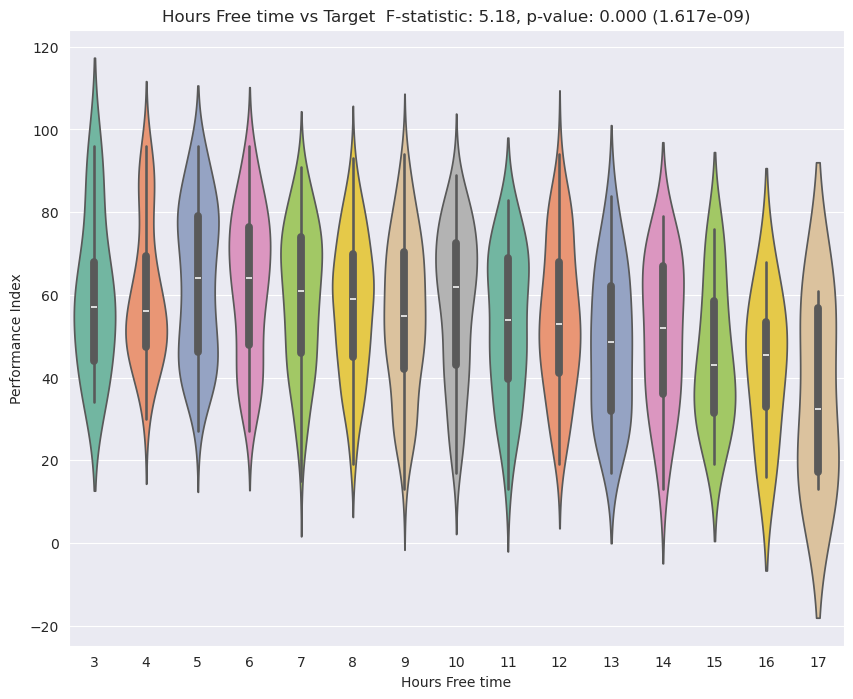

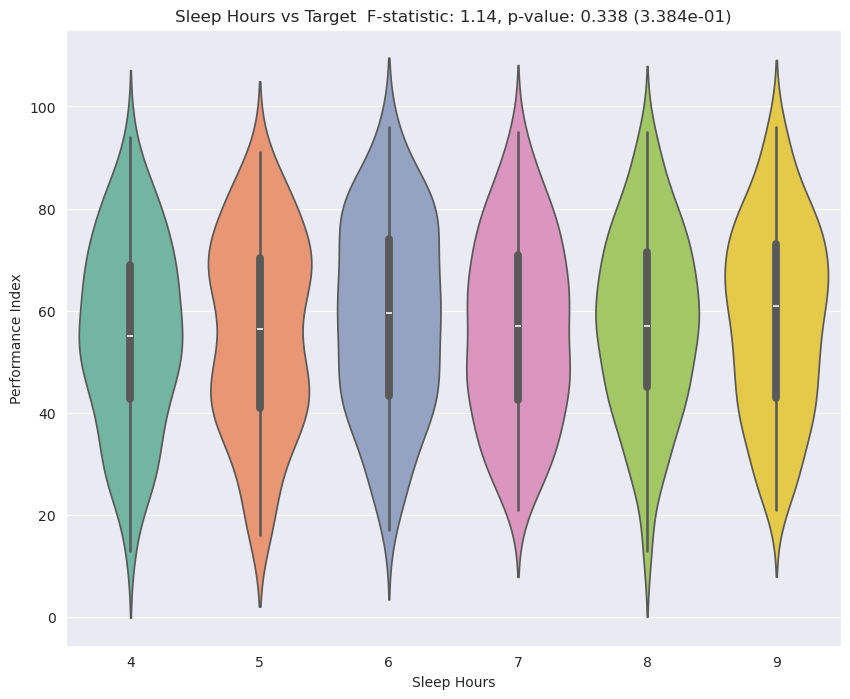

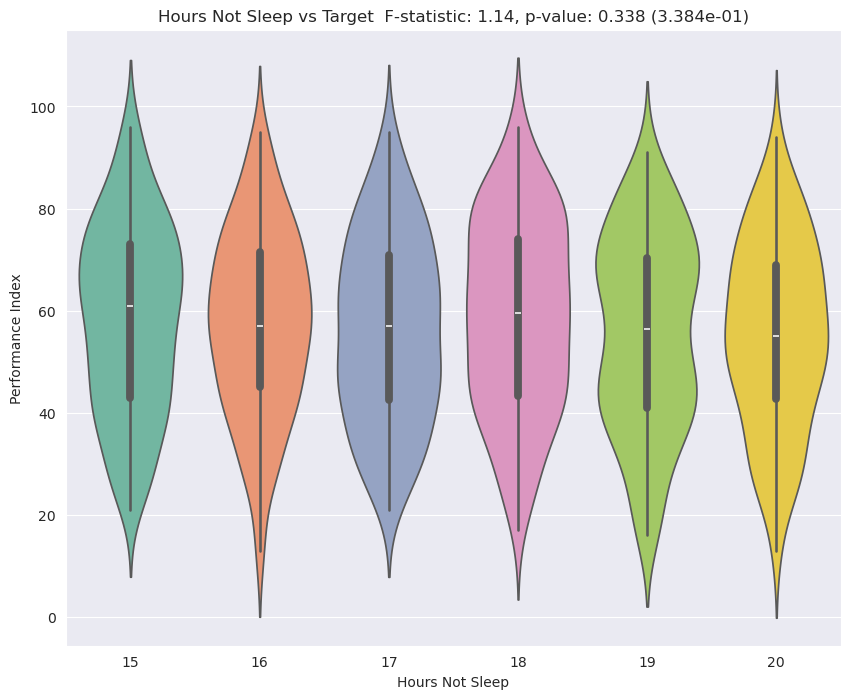

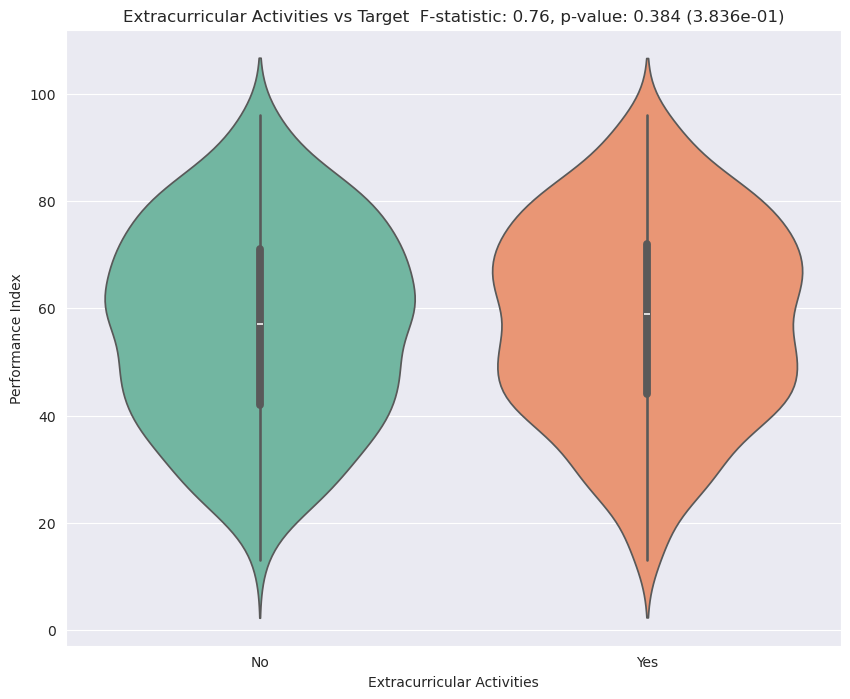

/home/dmitri/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


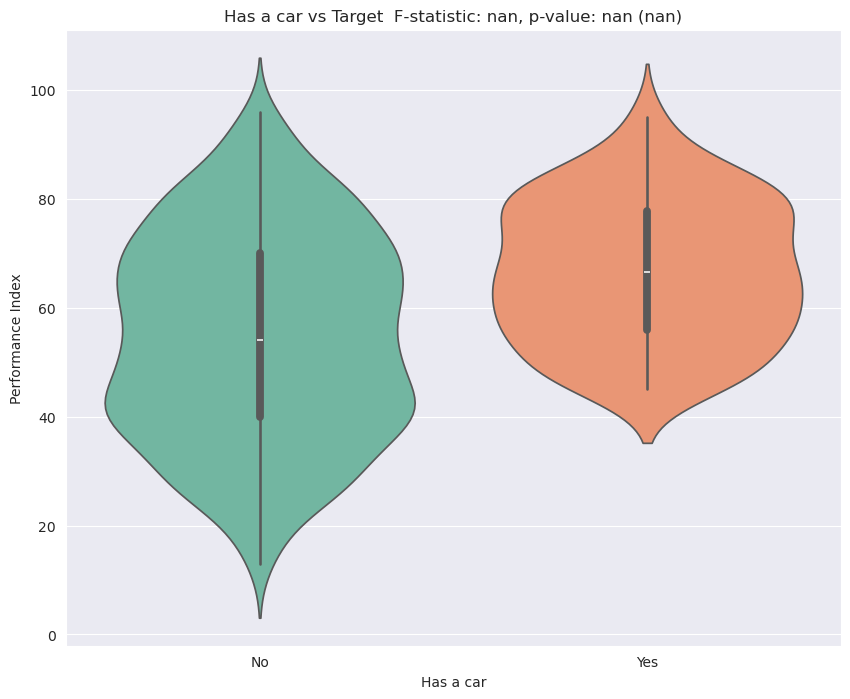

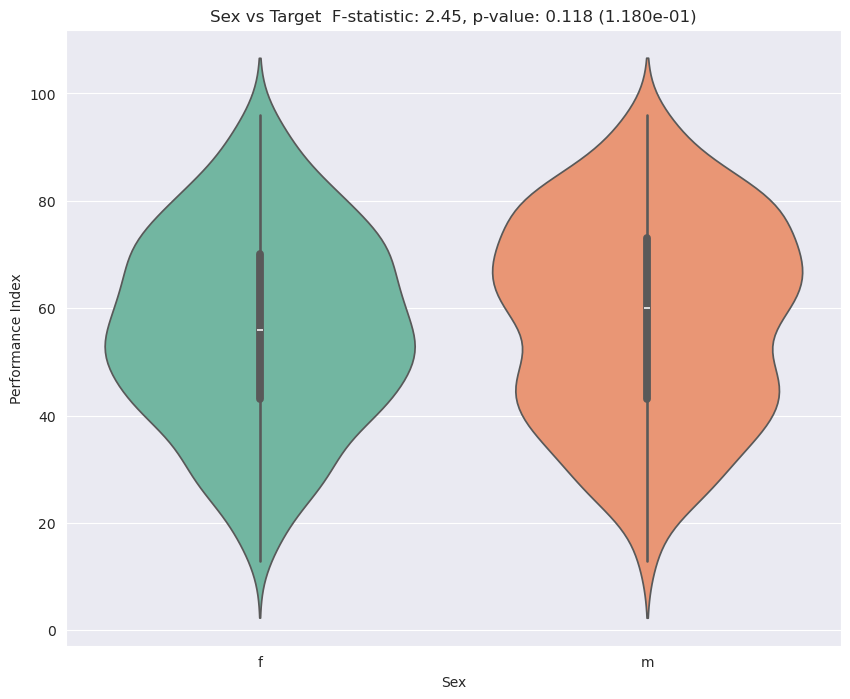

/home/dmitri/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


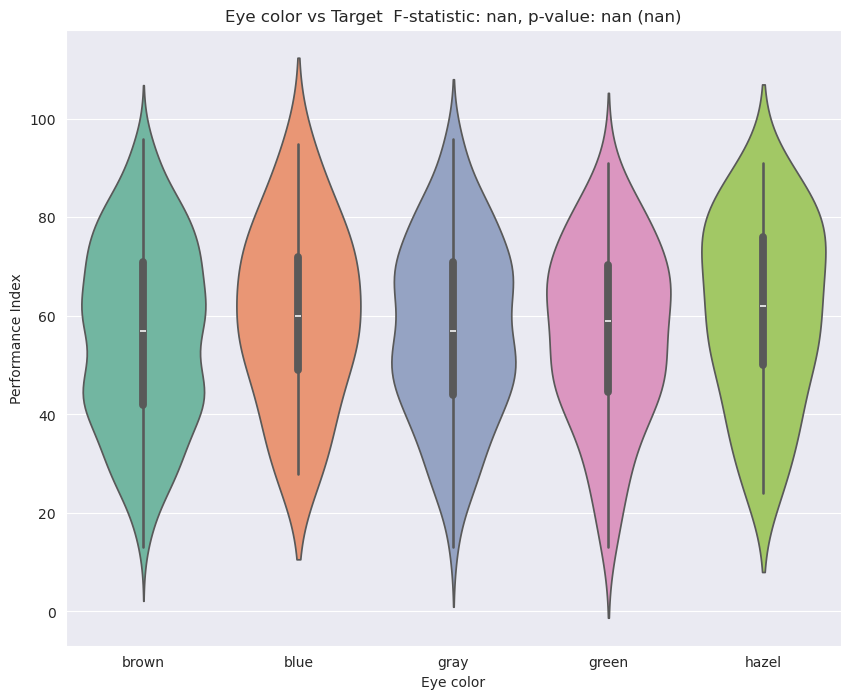

/home/dmitri/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


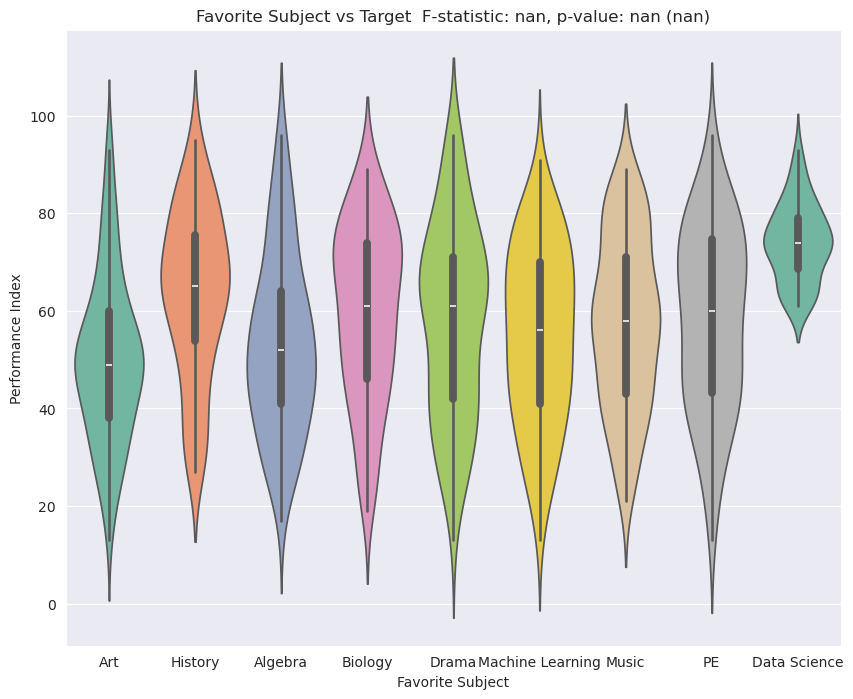

/home/dmitri/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


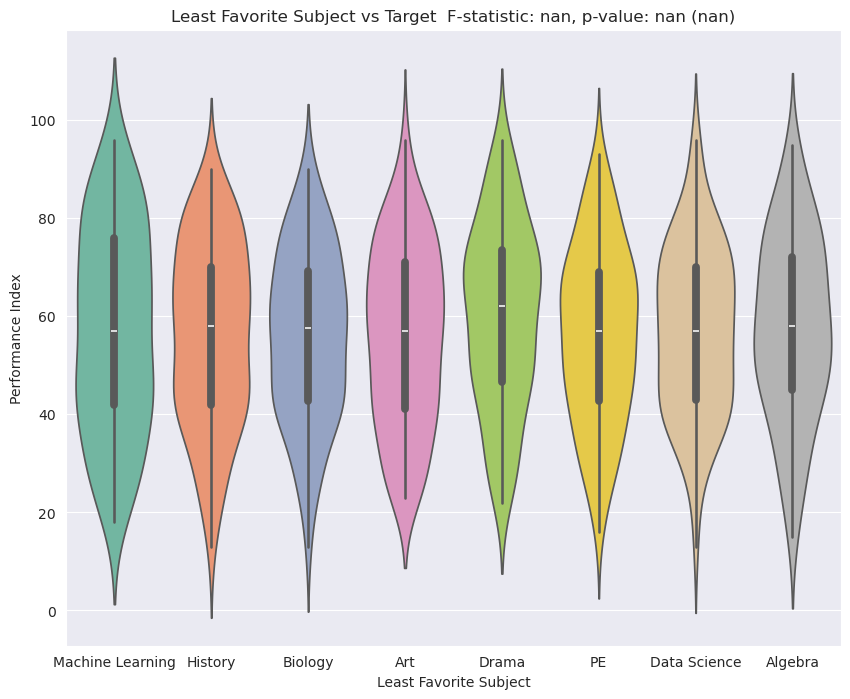

,Feature,F-statistic,p-value,significance
0,Previous Scores (out of 10),428.751965,8.369837e-295,F is significant on 95% level
1,Sample Question Papers Practiced,0.653105,7.517420e-01,F is not significant
2,Hours Studied,15.324203,2.292059e-21,F is significant on 95% level
3,Hours Prepared for Exams,36.102064,3.764458e-22,F is significant on 95% level
4,Hours Free time,5.181980,1.617320e-09,F is significant on 95% level
5,Sleep Hours,1.137958,3.383884e-01,F is not significant
6,Hours Not Sleep,1.137958,3.383884e-01,F is not significant
7,Extracurricular Activities,0.759957,3.835518e-01,F is not significant
8,Has a car,NaN,NaN,insufficient sampling
9,Sex,2.447290,1.180450e-01,F is not significant


In [63]:
from scipy.stats import f_oneway

discrete_features = hirarchial_columns + categorical_columns

ANOVA = []
for feature in discrete_features:

    groups = [df[df[feature] == category]['Performance Index'] for category in df[feature].unique()]

    F, p_value = f_oneway(*groups)
    ANOVA.append({'Feature': feature, 'F-statistic': F, 'p-value': p_value})

    plt.figure(figsize=(10, 8))
    sns.violinplot(data=df, x=feature, y='Performance Index', palette='Set2', hue=feature, legend=False)
    plt.title(f"{feature} vs Target  F-statistic: {F:.2f}, p-value: {p_value:.3f} ({p_value:.3e})")
    plt.show()

def significance_check(val) -> str:
    if np.isnan(val):
        return 'insufficient sampling'
    else:
        if val < 0.05:
            return 'F is significant on 95% level'
        else:
            return 'F is not significant'

anova_results = pd.DataFrame(ANOVA)
anova_results['significance'] = anova_results['p-value'].apply(lambda x: significance_check(x))
anova_results

For ANOVA hypotheses the Ho states that there's no difference between subgroups in dependent variable. In this case Larger F statistic and smaller p-value indicates that there's significant evidence of differences in the groups. So we can reject Ho in some cases which means that differences in distributions are statistically significant. 

At the end more larger difference -- better feature because a dummy variable converted from this feature will show us better results.

`anova_results` dataframe shows us which feature has significant differences, which does not and which has insufficient sampling because of nans

The most useful therefore:
* none of continuous 
* Previous Scores (out of 10) -- logical because if you're good, you're good
* Hours Studied -- logical 'cause time and effort spent
* Hours Prepared for Exams -- same as previous 
* Hours Free time -- not sure about that

Significances seems to be logical excel for sleeps hours but i'm not sure about that

# Task 2 (3 points)

Split data into train and test. Set `test_size=0.3, random_state=0`

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.3, random_state=0)

Preprocess the data:


*   Depict number of missing values in every column, replace missing values with median, computed on train data (numerical features) or with 'Not Given' (categorical features)
*   Encode the categorical with one-hot-encoder



In [6]:
values = {
    col: df[col].mean() if df[col].dtype != 'object' else 'not given' for col in df.columns 
}
X_test.fillna(values, inplace=True)
X_train.fillna(values, inplace=True)

print(X_train.isnull().any())
print(X_test.isnull().any())

ID                                  False
Performance Index                   False
Previous Scores (out of 10)         False
Sample Question Papers Practiced    False
Hours Studied                       False
Hours Prepared for Exams            False
Hours Free time                     False
Sleep Hours                         False
Hours Not Sleep                     False
Extracurricular Activities          False
Has a car                           False
Sex                                 False
Height                              False
Weight                              False
BMI                                 False
Eye color                           False
Nails length                        False
Favorite Subject                    False
Least Favorite Subject              False
dtype: bool
ID                                  False
Performance Index                   False
Previous Scores (out of 10)         False
Sample Question Papers Practiced    False
Hours Studied         

NaNs are terminated

Let's crate dummies 

In [7]:
df_dummies = pd.get_dummies(df[categorical_columns], drop_first=False, dtype=int)
df_dummies

,Extracurricular Activities_No,Extracurricular Activities_Yes,Has a car_No,Has a car_Yes,Sex_f,Sex_m,Eye color_blue,Eye color_brown,Eye color_gray,Eye color_green,...,Favorite Subject_Music,Favorite Subject_PE,Least Favorite Subject_Algebra,Least Favorite Subject_Art,Least Favorite Subject_Biology,Least Favorite Subject_Data Science,Least Favorite Subject_Drama,Least Favorite Subject_History,Least Favorite Subject_Machine Learning,Least Favorite Subject_PE
0,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
996,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,0,1,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
998,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_final = pd.concat([df.drop(columns=categorical_columns), df_dummies], axis=1)
df_final

,ID,Performance Index,Previous Scores (out of 10),Sample Question Papers Practiced,Hours Studied,Hours Prepared for Exams,Hours Free time,Sleep Hours,Hours Not Sleep,Height,...,Favorite Subject_Music,Favorite Subject_PE,Least Favorite Subject_Algebra,Least Favorite Subject_Art,Least Favorite Subject_Biology,Least Favorite Subject_Data Science,Least Favorite Subject_Drama,Least Favorite Subject_History,Least Favorite Subject_Machine Learning,Least Favorite Subject_PE
0,1,32.0,6,0,1,1,15,4,20,1.723207,...,0,0,0,0,0,0,0,0,1,0
1,2,95.0,9,3,9,4,5,8,16,1.673278,...,0,0,0,0,0,0,0,0,1,0
2,3,58.0,6,3,8,3,9,5,19,1.592017,...,0,0,0,0,0,0,0,1,0,0
3,4,44.0,5,3,7,3,8,4,20,1.643083,...,0,0,0,0,1,0,0,0,0,0
4,5,61.0,5,3,8,3,6,8,16,1.717139,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,83.0,10,7,5,2,10,4,20,1.645952,...,1,0,0,0,0,0,0,0,1,0
996,997,75.0,8,8,8,3,7,6,18,1.661157,...,0,0,0,0,0,0,0,0,0,1
997,998,48.0,7,2,3,2,12,6,18,1.764359,...,0,1,0,0,0,0,0,0,0,0
998,999,38.0,5,9,4,2,12,4,20,1.664407,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# let's just remake tran and test dfs
df_final.fillna(values, inplace=True)

y = df_final['Performance Index']
X = df_final.drop(columns=['Performance Index', 'ID']) # by any means ID is not a regressor 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Train linear regression without regularization, compute MSE on train and test data.

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

fit = LinearRegression().fit(X_train, y_train)

# let's make some predictions
mse_train = mean_squared_error(y_train, fit.predict(X_train))
mse_test = mean_squared_error(y_test,  fit.predict(X_test))

print(f'train MSE: {mse_train}')
print(f'test MSE: {mse_test}')

train MSE: 31.824885126359135
test MSE: 38.83727873338968


As we can see, test MSE larger than train MSE so there may be a case of overfitting. So unregularized data is not best option for linear model

# Task 3 (3 points)

Investigate the coefficients of the model. Why are they so big/small? Can the absolute value of the coefficitnt be used as a measure of importance of the feature? Why/why not?

In [98]:
coefficients = pd.DataFrame({
    'column' : X_train.columns,
    'coefficient' : fit.coef_
}).sort_values(by='coefficient', ascending=False)
coefficients

,column,coefficient
10,Nails length,42.988669
7,Height,10.078618
0,Previous Scores (out of 10),8.714135
17,Eye color_blue,3.035575
25,Favorite Subject_Data Science,3.028535
2,Hours Studied,2.751614
27,Favorite Subject_History,1.147448
12,Extracurricular Activities_Yes,0.715184
35,Least Favorite Subject_Drama,0.700945
34,Least Favorite Subject_Data Science,0.687052


size of coefficient is determined by change in the dependent variable for a one-unit increase in the corresponding independent variable, holding all other variables constant. Bigger coefficient means bigger distance for a one-unit increase. 

No, it cannot be used as estimator of feature importance. It's not what is designed for.
Reasons: not scaled, does not include context of the model (what if model is logliniear or can be nulled by dummy), and sometimes colinearity when effect of one feature may be spread across several correlated features.

Draw conclusions about the model and important features and explain if it is logical. If it cannot be done right now, tackle the problem.

In [99]:
from sklearn.preprocessing import StandardScaler
# judging by this little hint you want me to do this:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
y_scaled = (y_train - y_train.mean()) / y_train.std()
fit_scaled = LinearRegression().fit(X_scaled, y_scaled)

coefficients_scaled = pd.DataFrame({
    'column' : X_train.columns,
    'coefficient' : np.abs(fit_scaled.coef_)
}).sort_values(by='coefficient', ascending=False)
coefficients_scaled['coefficient'] = coefficients_scaled['coefficient'].round(2)
coefficients_scaled

,column,coefficient
0,Previous Scores (out of 10),0.88
2,Hours Studied,0.38
9,BMI,0.16
8,Weight,0.16
7,Height,0.04
25,Favorite Subject_Data Science,0.03
17,Eye color_blue,0.03
13,Has a car_No,0.03
11,Extracurricular Activities_No,0.02
12,Extracurricular Activities_Yes,0.02


now, after scaling size if coefficients represent actual feature importance. For example, top 3 of them are `Extracurricular Activities` (it's a dummy), `Hours Not Sleep`, and `Sleep Hours` 

It's possible because we changed properties of distributions for all variables: sigma 1 and mean 0. And thus changes in units of coefficients represent active change in std relative to dependent and all independent variables.

But yet feature selection is a tricky process. For example, we can automate it with Ridge regression or even treat all variables as dependent and explonatory with Bayesian regressions. But yet research design may imply some potential problems with logical placement of variables. As such backdoor criterion bias or else.

# Task 3 (3 points)

For different `alpha` hyperparameter fit linear regression with $L_1$ regularization (`Lasso` model, if there are warnings - set `tol=0.1`).

Choose the grid in such way that the smallest alpha will result in 0-5 zero coefficent and for biggest - all coefficient will be 0.

For every model save number of zero coefficients and MSE on train and test data

In [118]:
from sklearn.linear_model import Lasso
from tqdm.notebook import tqdm

alphas = np.logspace(-4, 1, 50)

# that will be tricky
coeficients_ttl = []
zero_coefficients = []
train_mses = []
test_mses = []

for alpha in tqdm(alphas):
    lasso = Lasso(alpha=alpha, tol=0.1, random_state=42)
    lasso.fit(X_train, y_train)

    zero_coefficients.append(np.sum(lasso.coef_ == 0))
    train_mses.append(mean_squared_error(y_train, lasso.predict(X_train)))
    test_mses.append(mean_squared_error(y_test, lasso.predict(X_test)))
    coeficients_ttl.append(lasso.coef_)

results_df = pd.DataFrame({
    'alpha': alphas,
    'n_zero_coefs': zero_coefficients,
    'train_mse': train_mses,
    'test_mse': test_mses,
})

# So let's find optimal alpha 
min_alpha = results_df.loc[results_df['n_zero_coefs'] <= 5, 'alpha'].min()
max_alpha =results_df['n_zero_coefs'].max()

print(f"small alpha: {min_alpha}")
print(f"large alpha: {max_alpha}")

# code reference from https://www.kirenz.com/blog/posts/2019-08-12-python-lasso-regression-auto/

  0%|          | 0/50 [00:00<?, ?it/s]

small alpha: 0.0001
large alpha: 37


In [119]:
# unnullable features 

feature_names = X_train.columns
non_zero_indices = np.where(lasso.coef_ != 0)[0]  # Indices of non-zero coefficients
non_zero_features = [feature_names[i] for i in non_zero_indices]
non_zero_features

['Previous Scores (out of 10)', 'Hours Studied']

Seems to be right. But yet we have 37 as max alpha which might indicate very high feature importance so it's cannot be nullified. Close inspection showed that  `['Previous Scores (out of 10)', 'Hours Studied']` have heavy importance and may be 

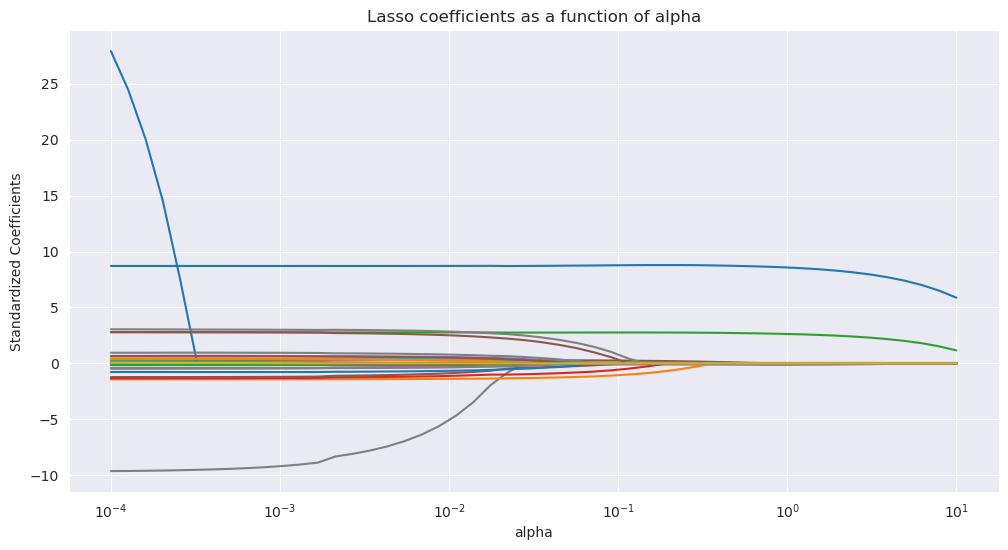

In [109]:
plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.plot(alphas, coeficients_ttl)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [110]:
results_df

,alpha,n_zero_coefs,train_mse,test_mse
0,0.000100,1,31.886208,38.901304
1,0.000126,1,31.887058,38.901520
2,0.000160,2,31.888396,38.902101
3,0.000202,1,31.890508,38.903326
4,0.000256,1,31.893852,38.905660
5,0.000324,2,31.898337,38.908735
6,0.000409,2,31.898449,38.905254
7,0.000518,3,31.898593,38.900774
8,0.000655,4,31.898770,38.893770
9,0.000829,3,31.899024,38.884947


In [111]:
# let's try to scale it just in case we can nullify all coefficients 
# also i'll increase alpha logspace
alphas = np.logspace(-4, 1, 100)
scaler_lasso = StandardScaler()

X_train_scaled = scaler_lasso.fit_transform(X_train)
X_test_scaled = scaler_lasso.fit_transform(X_test)

# that will be tricky
coeficients_ttl = []
zero_coefficients = []
train_mses = []
test_mses = []

for alpha in tqdm(alphas):
    lasso = Lasso(alpha=alpha, tol=0.1, random_state=42)
    lasso.fit(X_train_scaled, y_train)

    zero_coefficients.append(np.sum(lasso.coef_ == 0))
    train_mses.append(mean_squared_error(y_train, lasso.predict(X_train_scaled)))
    test_mses.append(mean_squared_error(y_test, lasso.predict(X_test_scaled)))
    coeficients_ttl.append(lasso.coef_)

results_df = pd.DataFrame({
    'alpha': alphas,
    'n_zero_coefs': zero_coefficients,
    'train_mse': train_mses,
    'test_mse': test_mses,
})

# So let's find optimal alpha 
min_alpha = results_df.loc[results_df['n_zero_coefs'] <= 5, 'alpha'].min()
max_alpha =results_df['n_zero_coefs'].max()

print(f"small alpha: {min_alpha}")
print(f"large alpha: {max_alpha}")

  0%|          | 0/100 [00:00<?, ?it/s]

small alpha: 0.0001
large alpha: 38


In [113]:
# unnullable features 

feature_names = X_train.columns
non_zero_indices = np.where(lasso.coef_ != 0)[0]  # Indices of non-zero coefficients
non_zero_features = [feature_names[i] for i in non_zero_indices]
non_zero_features

['Previous Scores (out of 10)']

Yet, after all this effort, `Previous Scores (out of 10)` still has too much importance so i'll rollout to previous model

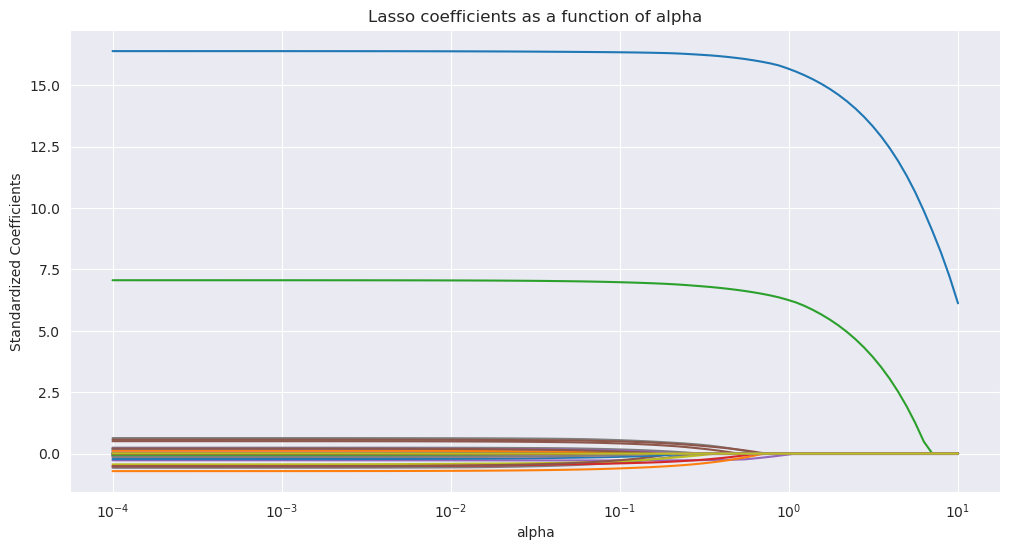

In [115]:
plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.plot(alphas, coeficients_ttl)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

----

Draw 2 plots near each other: number of zero coefficients and  MSE (both train and test on one plot).  Draw conclusions: compare the MSE of Lasso and initial linear regression, investigate the importance of features in the new model (which are non-zero?).

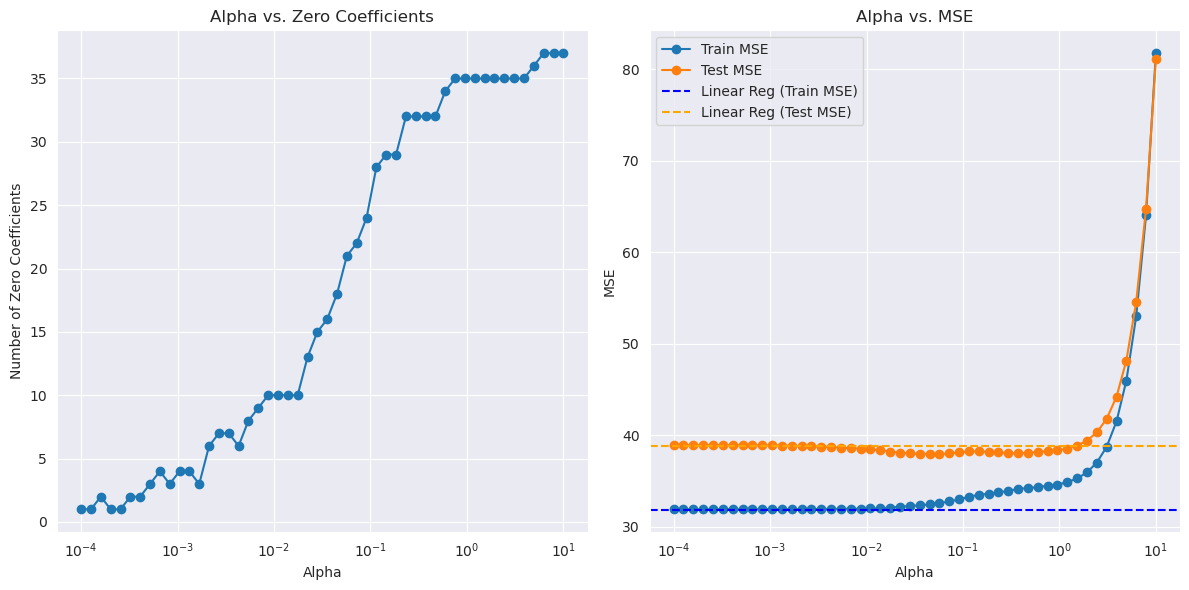

In [120]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alphas, zero_coefficients, marker='o', label='Zero Coefficients')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Zero Coefficients')
plt.title('Alpha vs. Zero Coefficients')

plt.subplot(1, 2, 2)
plt.plot(alphas, train_mses, label='Train MSE', marker='o')
plt.plot(alphas, test_mses, label='Test MSE', marker='o')
plt.axhline(y=mse_train, color='blue', linestyle='--', label='Linear Reg (Train MSE)')
plt.axhline(y=mse_test, color='orange', linestyle='--', label='Linear Reg (Test MSE)')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Alpha vs. MSE')
plt.legend()

plt.tight_layout()
plt.show()

In [126]:
best_alpha_idx = np.argmin(test_mses)
best_alpha = alphas[best_alpha_idx]

lasso_best = Lasso(alpha=best_alpha, tol=0.1, random_state=42)
lasso_best.fit(X_train, y_train)

print(f"best alpha: {format(best_alpha, ".2e")}")
feature_names = X_train.columns
non_zero_indices = np.where(lasso.coef_ != 0)[0]  # Indices of non-zero coefficients
print(f"non-zero coefficients: {[feature_names[i] for i in non_zero_indices]}")
print(f"num of non-zero features: {len(non_zero_features)}")

best alpha: 5.69e-02
non-zero coefficients: ['Previous Scores (out of 10)', 'Hours Studied']
# of non-zero features: 18


As we can see from the graph Lasso outperforms OLS at alpha = 5.69e-02. In that case non-zeros will be well known `['Previous Scores (out of 10)', 'Hours Studied']` with total non-zero features of 18

# Task 4 (2 points)

Now, use $L_2$ regularization. Tune hyperparameters of `Ridge` model  using cross-validation. Report the best MSE on test data.  

In [150]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# again with a little hint

params = {'alpha' : np.logspace(-12, 10, 50)}

ridge = Ridge()

grid_search = GridSearchCV(ridge, params, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Let's get the best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best alpha: 3.727593720314938


We now have the best alpha from GridSearchCV. let's not plug it in

Investigate coefficients: how many zeros? Which features are important?

In [154]:
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_scaled, y_train)

ridge_result = pd.DataFrame({
    'feature name' : feature_names,
    'coef': np.abs(best_ridge.coef_)
}).sort_values('coef', ascending=False)
ridge_result

,feature name,coef
0,Previous Scores (out of 10),16.335481
2,Hours Studied,6.595199
8,Weight,1.380125
9,BMI,1.124525
25,Favorite Subject_Data Science,0.652866
17,Eye color_blue,0.615281
13,Has a car_No,0.607404
3,Hours Prepared for Exams,0.506422
11,Extracurricular Activities_No,0.355134
12,Extracurricular Activities_Yes,0.355134


Unlike Lasso, Ridge regressions may not include true zeros because loss function of lasso is designed to minimize the coefficient to zero and in Ridge the loss shrinks coefficients but keeps all features in the model. The importance, same as in Lasso regression, is determined by size of absolute value of the coefficient. 

In [155]:
# in this case we can say that these feature have large importance:
ridge_result.loc[ridge_result['coef'] > 1]

,feature name,coef
0,Previous Scores (out of 10),16.335481
2,Hours Studied,6.595199
8,Weight,1.380125
9,BMI,1.124525


In [151]:
ridge_train_mse = mean_squared_error(y_train, best_ridge.predict(X_train_scaled))
ridge_test_mse = mean_squared_error(y_test, best_ridge.predict(X_test_scaled))

print(f"ridge train MSE: {ridge_train_mse:.4f}")
print(f"ridge train MSE: {ridge_test_mse:.4f}")

ridge train MSE: 31.8712
ridge train MSE: 38.7913


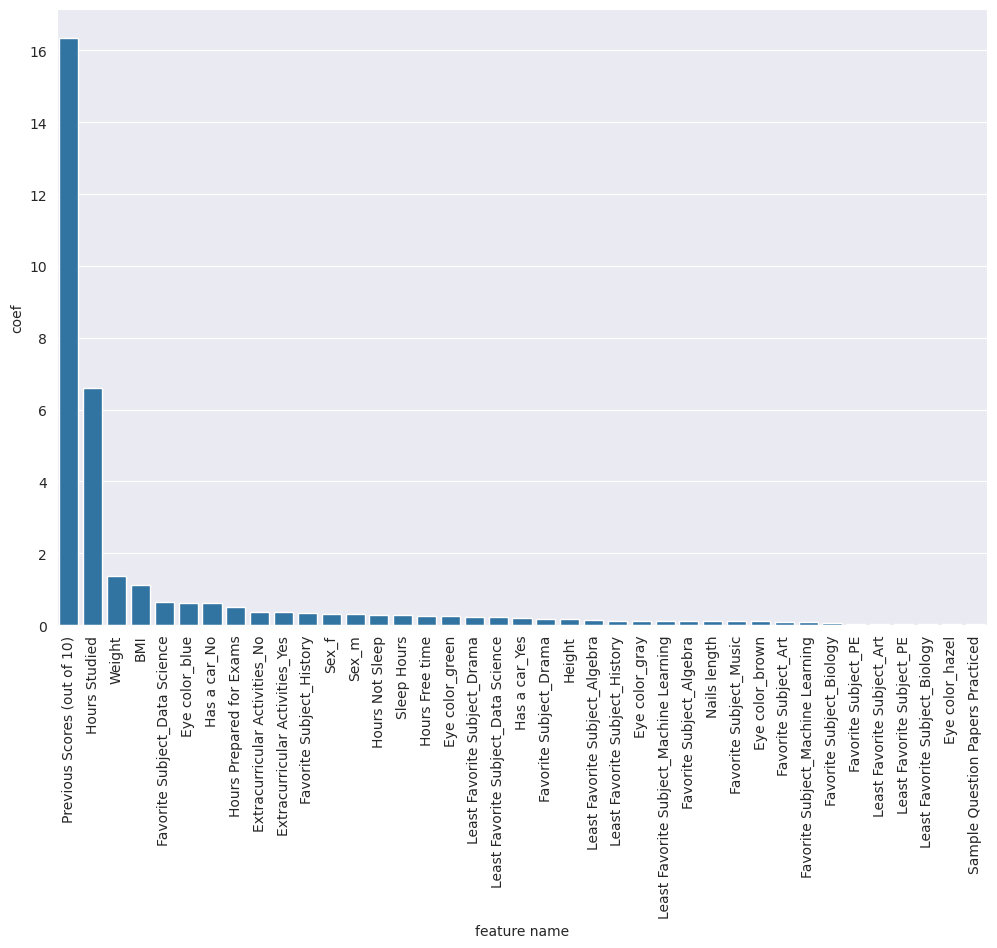

In [163]:
plt.figure(figsize=(12, 8))
sns.barplot(ridge_result, x="feature name", y="coef")
plt.xticks(rotation=90)
plt.show()

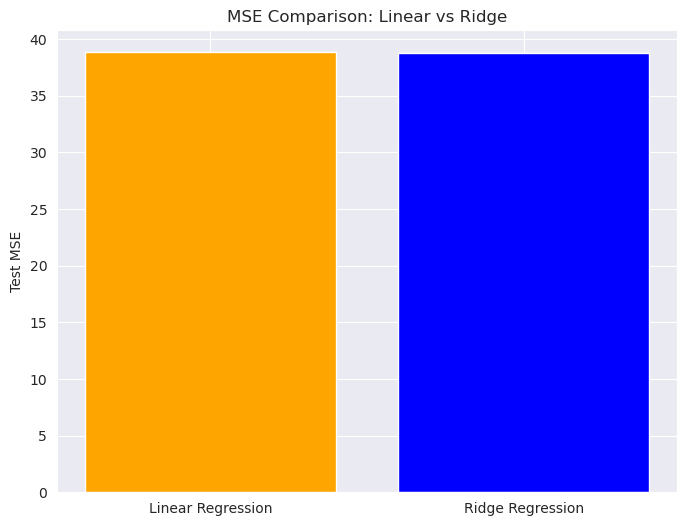

In [138]:
# let's compare MSE
models = ['Linear Regression', 'Ridge Regression']
mse_values = [mse_test, ridge_test_mse]

plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=['orange', 'blue'])
plt.ylabel('Test MSE')
plt.title('MSE Comparison: Linear vs Ridge')
plt.show()


As we can see, ridge regression performed the same for test data. So by results of both OSL and ridge made no difference in sense of performance.